In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import random
import tqdm
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D,Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data Cleaning

In [10]:
train_data_path = "/kaggle/input/breast-cancer-detection/train"
test_data_path = "/kaggle/input/breast-cancer-detection/test"
val_data_path = "/kaggle/input/breast-cancer-detection/valid"

# Train date preparation

In [11]:
categories = ["0", "1"]
train_data = []
for category in categories:
    category_path = os.path.join(train_data_path, category)
    index = categories.index(category)
    for image in tqdm.tqdm(os.listdir(category_path)):
        img_path = os.path.join(category_path, image)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        train_data.append([img, index])

100%|██████████| 803/803 [00:03<00:00, 231.64it/s]


In [12]:
#print(len(train_data))
len(train_data)

2372

# test data preparation

In [13]:
categories = ["0", "1"]
test_data = []
for category in categories:
    category_path = os.path.join(test_data_path, category)
    index = categories.index(category)
    for image in tqdm.tqdm(os.listdir(category_path)):
        img_path = os.path.join(category_path, image)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        test_data.append([img, index])

100%|██████████| 128/128 [00:00<00:00, 239.89it/s]


In [15]:
len(test_data)

336

In [14]:
categories = ["0", "1"]
val_data = []
for category in categories:
    category_path = os.path.join(val_data_path, category)
    index = categories.index(category)
    for image in tqdm.tqdm(os.listdir(category_path)):
        img_path = os.path.join(category_path, image)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        val_data.append([img, index])

100%|██████████| 227/227 [00:00<00:00, 234.77it/s]


In [16]:
len(val_data)

675

In [19]:
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(val_data)

# List to numpy array conversion

train data

In [20]:
x_train_list = []
y_train_list = []
for image, label in train_data:
    x_train_list.append(image)
    y_train_list.append(label)
    
x_train = np.array(x_train_list)/255
y_train = np.array(y_train_list)

In [21]:
x_train.shape

(2372, 224, 224, 3)

# test data

In [22]:
x_test_list = []
y_test_list = []
for image, label in test_data:
    x_test_list.append(image)
    y_test_list.append(label)
    
x_test = np.array(x_test_list)/255
y_test = np.array(y_test_list)

In [23]:
x_test.shape

(336, 224, 224, 3)

In [24]:
y_test.shape

(336,)

# val_data

In [26]:
x_val_list = []
y_val_list = []
for image, label in val_data:
    x_val_list.append(image)
    y_val_list.append(label)
    
x_val = np.array(x_val_list)/255
y_val = np.array(y_val_list)

In [27]:
x_val.shape

(675, 224, 224, 3)

# Sample Visualization


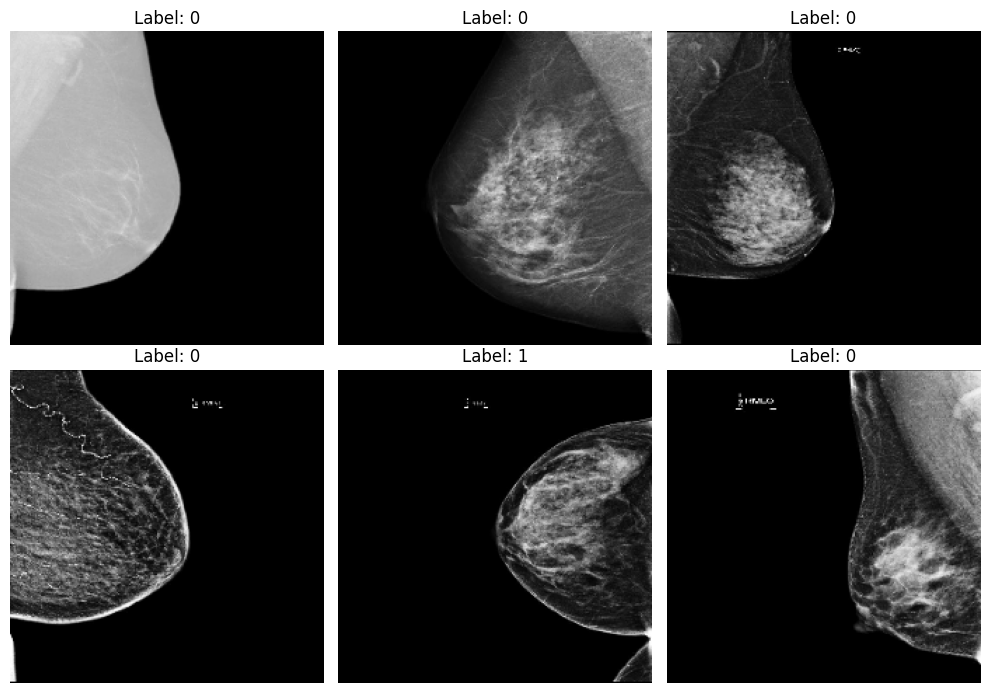

In [29]:
num_images = 6


random_indices = np.random.choice(len(x_train), num_images, replace=False)


fig, axes = plt.subplots(2, 3, figsize=(10, 7))


for i, idx in enumerate(random_indices):
    ax = axes[i // 3, i % 3]  
    ax.imshow(x_train[idx], cmap='gray')  
    ax.set_title(f"Label: {y_train[idx]}")  
    ax.axis('off')


plt.tight_layout()
plt.show()

In [30]:
model = Sequential()

model.add(Conv2D(100,(3, 3), activation = "relu", input_shape = (224, 224, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(100,(3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64,(3, 3), activation = "relu"))
#model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64,(3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(.2))
#model.add(Dense(32, activation = "relu"))
model.add(Dropout(.3))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 100)  │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        57,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,560,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,749,669 (10.49 MB)

 Trainable params: 2,749,669 (10.49 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(x_train, y_train, epochs = 20, validation_data=(x_val, y_val), verbose= 1)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 395s 5s/step - accuracy: 0.6674 - loss: 0.6781 - val_accuracy: 0.6637 - val_loss: 0.6351
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 442s 5s/step - accuracy: 0.6570 - loss: 0.6395 - val_accuracy: 0.6637 - val_loss: 0.6273
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 420s 5s/step - accuracy: 0.6642 - loss: 0.6340 - val_accuracy: 0.6593 - val_loss: 0.6340
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 390s 5s/step - accuracy: 0.6857 - loss: 0.6157 - val_accuracy: 0.6578 - val_loss: 0.6253
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 386s 5s/step - accuracy: 0.6897 - loss: 0.6033 - val_accuracy: 0.6696 - val_loss: 0.6211
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 366s 5s/step - accuracy: 0.6861 - loss: 0.6118 - val_accuracy: 0.6696 - val_loss: 0.6401
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 384s 5s/step - accuracy: 0.6999 - loss: 0.5967 - val_accuracy: 0.6622 - val_loss: 0.6372
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 371s 5s/step - accuracy: 0.7295 - loss: 0.5347 - val_accuracy: 0.6622 - v

# Graphs and Matrices
Loss and Accuracy

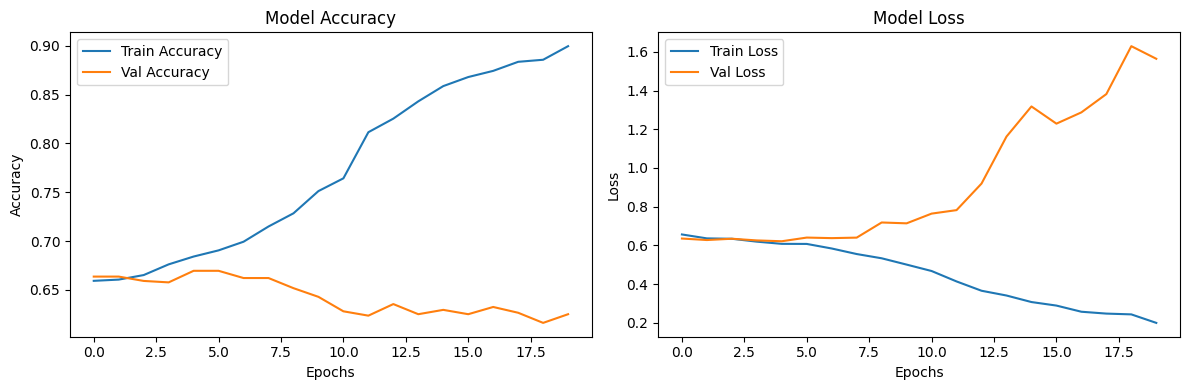

In [33]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
threshold = 0.5
y_pred = (model.predict(x_test)>= threshold).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


# Confution Matrix

<Figure size 1200x1000 with 0 Axes>

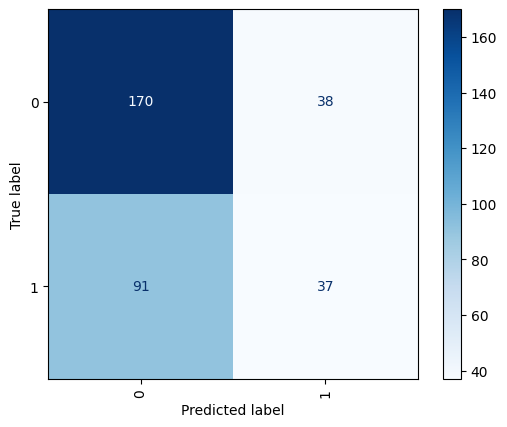

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

# Model evalution

In [36]:
model.evaluate(x_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6107 - loss: 1.2870


[1.3940110206604004, 0.6160714030265808]